**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [5]:
#@ INSTALLING DEPENDENCIES: UNCOMMENT BELOW: 
# !pip install -Uqq fastbook
# import fastbook
# fastbook.setup_book()

In [6]:
#@ DOWNLOADING LIBRARIES AND DEPENDENCIES: 
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.medical.imaging import *

import pydicom 
import pandas as pd

**GETTING DICOM FILES:**
- **DICOM** stands for Digital Imaging and Communications in Medicine. It is the de-facto standard that establishes rules that allow the medical images and associated information to be exchanged between imaging equipment from different vendors, computers and hospitals. 

In [8]:
#@ GETTING DICOM FILES: 
pneumothorax_source = untar_data(URLs.SIIM_SMALL)           # Downloading the Files. 
items = get_dicom_files(pneumothorax_source/f"train/")      # Getting Items. 

#@ SPLITTING THE DATA ITEMS: 
train, val = RandomSplitter()(items)                        # Splitting the Items. 

In [9]:
#@ LOADING THE DICOM FILE: 
patient = 7                                                 # Initializing an Item. 
xray_sample = items[patient].dcmread()                      # Initialization. 
xray_sample                                                 # Inspecting the Data. 

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.5871.1517875191.986435
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.5871.1517875191.986435
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

**Note:**
- The detailed explanations is in [**Fastai**](https://docs.fast.ai/tutorial.medical_imaging.html). 

In [10]:
#@ INSPECTING PIXEL DATA: 
xray_sample.PixelData[:200]                               # Inspecting the Pixel. 

b'\xfe\xff\x00\xe0\x00\x00\x00\x00\xfe\xff\x00\xe0f\xc6\x01\x00\xff\xd8\xff\xdb\x00C\x00\x03\x02\x02\x02\x02\x02\x03\x02\x02\x02\x03\x03\x03\x03\x04\x06\x04\x04\x04\x04\x04\x08\x06\x06\x05\x06\t\x08\n\n\t\x08\t\t\n\x0c\x0f\x0c\n\x0b\x0e\x0b\t\t\r\x11\r\x0e\x0f\x10\x10\x11\x10\n\x0c\x12\x13\x12\x10\x13\x0f\x10\x10\x10\xff\xc0\x00\x0b\x08\x04\x00\x04\x00\x01\x01\x11\x00\xff\xc4\x00\x1d\x00\x00\x02\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x03\x04\x02\x05\x00\x01\x06\x07\x08\t\xff\xc4\x00\\\x10\x00\x01\x04\x01\x03\x02\x05\x01\x04\x06\x03\n\t\x08\x07\t\x01\x00\x02\x03\x11!\x04\x121\x05A\x06\x13"Qaq2\x81\x91\xa1\x07\x14#B\xb1\xc1R\xd1\xd2\x15\x16$3br\x92\xb2\xe1\xf0\x08%4CS\x95\xa2\xb3'

In [11]:
#@ INSPECTING PIXEL DATA: 
xray_sample.pixel_array, xray_sample.pixel_array.shape    # Inspecting the Pixel. 

(array([[ 3,  6,  6, ...,  7,  8,  2],
        [ 7, 10, 10, ..., 16, 17, 11],
        [ 7, 11, 11, ..., 15, 16,  9],
        ...,
        [ 5,  6,  7, ..., 12, 11,  7],
        [ 3,  5,  6, ..., 10, 10,  5],
        [ 1,  3,  4, ...,  6,  6,  1]], dtype=uint8), (1024, 1024))

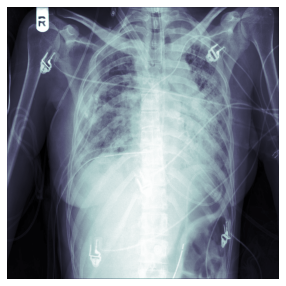

In [12]:
#@ INSPECTING THE DICOM FILE: 
xray_sample.show()

In [14]:
#@ CREATING DICOM DATAFRAME: 
dicom_dataframe = pd.DataFrame.from_dicoms(items)                       # Initializing a DataFrame. 
dicom_dataframe[:2]                                                     # Inspecting a DataFrame. 

,SpecificCharacterSet,SOPClassUID,SOPInstanceUID,StudyDate,StudyTime,AccessionNumber,Modality,ConversionType,ReferringPhysicianName,SeriesDescription,PatientName,PatientID,PatientBirthDate,PatientSex,PatientAge,BodyPartExamined,ViewPosition,StudyInstanceUID,SeriesInstanceUID,StudyID,SeriesNumber,InstanceNumber,PatientOrientation,SamplesPerPixel,PhotometricInterpretation,Rows,Columns,PixelSpacing,BitsAllocated,BitsStored,HighBit,PixelRepresentation,LossyImageCompression,LossyImageCompressionMethod,fname,MultiPixelSpacing,PixelSpacing1,img_min,img_max,img_mean,img_std,img_pct_window
0,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.32498.1517875160.877894,19010101,000000.00,,CR,WSD,(),view: AP,"(c, f, 2, a, 4, 6, 7, f, -, e, b, 2, 0, -, 4, 5, 1, 6, -, 8, f, 3, 6, -, 3, 6, d, e, 2, d, 4, 5, 4, 5, 4, e)",cf2a467f-eb20-4516-8f36-36de2d45454e,,F,48,CHEST,AP,1.2.276.0.7230010.3.1.2.8323329.32498.1517875160.877893,1.2.276.0.7230010.3.1.3.8323329.32498.1517875160.877892,,1,1,,1,MONOCHROME2,1024,1024,0.168000,8,8,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000135.dcm,1,0.168000,0,255,107.833434,65.194095,0.241501
1,ISO_IR 100,1.2.840.10008.5.1.4.1.1.7,1.2.276.0.7230010.3.1.4.8323329.2233.1517875171.743462,19010101,000000.00,,CR,WSD,(),view: PA,"(3, 5, 9, d, e, c, 9, 3, -, 3, 5, f, e, -, 4, 0, a, 3, -, a, 3, 0, 8, -, 1, 5, 2, 4, 1, d, 5, d, 4, 3, 5, b)",359dec93-35fe-40a3-a308-15241d5d435b,,M,68,CHEST,PA,1.2.276.0.7230010.3.1.2.8323329.2233.1517875171.743461,1.2.276.0.7230010.3.1.3.8323329.2233.1517875171.743460,,1,1,,1,MONOCHROME2,1024,1024,0.194311,8,8,7,0,01,ISO_10918_1,/root/.fastai/data/siim_small/train/No Pneumothorax/000074.dcm,1,0.194311,0,185,110.787353,29.347244,0.139617


In [15]:
#@ LOADING LABELS: 
df = pd.read_csv(pneumothorax_source/f"labels.csv")                     # Creating a DataFrame. 
df.head(2)                                                              # Inspection. 

,file,label
0,train/No Pneumothorax/000000.dcm,No Pneumothorax
1,train/Pneumothorax/000001.dcm,Pneumothorax
